In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv


# Table of contents

<a href='#1'>1. Importing Libraries and Dataset </a> <br>
<a href='#2'>2. Dataset </a> <br>
<a href='#3'>3. Exploratory Data Analysis And Data Visualisation </a> <br>
<a href='#4'>4. Data Preprocessing</a> <br>
<a href='#5'>5. Logistic Regression </a> <br>
<a href='#6'>6. Gaussian Naive Bayes </a> <br>
<a href='#7'>7. KNN </a> <br>
<a href='#8'>8. Artificial Neural Networks </a> <br>
<a href='#9'>9. Random Forest </a> <br>
<a href='#10'>10. Gradient Boosting Machines </a> <br>
<a href='#11'>11. Xgboost </a> <br>
<a href='#12'>12. LightGBM </a> <br>
<a href='#13'>13. Comparison of All Models </a> <br>
<a href='#14'>14. Conclusion </a> <br>
<a href='#15'>15. End Note </a> <br>


# <a id='1'> 1. Importing Libraries </a>

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

> # <a id='2'> 2. Data Set</a>

## **Data Description** <br>
**id** <br> Unique ID for the customer <br>
**Gender**<br> Gender of the customer <br>
**Age**<br> Age of the customer <br>
**Driving_License** <br>
 0 : Customer does not have DL <br>
 1 : Customer already has DL <br>
**Region_Code**<br> Unique code for the region of the customer <br>
**Previously_Insured** <br>
1 : Customer already has Vehicle Insurance <br>
0 : Customer doesn't have Vehicle Insurance <br>
**Vehicle_Age** <br> Age of the Vehicle <br>
**Vehicle_Damage**: <br>
1 : Customer got his/her vehicle damaged in the past.<br>
0 : Customer didn't get his/her vehicle damaged in the past. <br>
**Annual_Premium**: The amount customer needs to pay as premium in the year <br>
**PolicySalesChannel**<br> Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
**Vintage**<br> Number of Days, Customer has been associated with the company <br>
**Response** <br>
1 : Customer is interested <br>
0 : Customer is not interested <br>

In [ ]:
train = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')
sample_sub = pd.read_csv('../input/health-insurance-cross-sell-prediction/sample_submission.csv')
df=train.copy()

In [ ]:
test.head(2)

In [ ]:
df.head(2)

In [7]:
df.shape

(381109, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
df.corr()

id       Age  Driving_License  Region_Code  \
id                    1.000000  0.001561        -0.000564    -0.000572   
Age                   0.001561  1.000000        -0.079782     0.042574   
Driving_License      -0.000564 -0.079782         1.000000    -0.001081   
Region_Code          -0.000572  0.042574        -0.001081     1.000000   
Previously_Insured    0.002457 -0.254682         0.014969    -0.024659   
Annual_Premium        0.003027  0.067507        -0.011906    -0.010588   
Policy_Sales_Channel -0.002837 -0.577826         0.043731    -0.042420   
Vintage              -0.000630 -0.001264        -0.000848    -0.002750   
Response             -0.001368  0.111147         0.010155     0.010570   

                      Previously_Insured  Annual_Premium  \
id                              0.002457        0.003027   
Age                            -0.254682        0.067507   
Driving_License                 0.014969       -0.011906   
Region_Code                    -0.024659       -0.010588   
Previously_Insured              1.000000        0.004269   
Annual_Premium                  0.004269        1.000000   
Policy_Sales_Channel            0.219381       -0.113247   
Vintage                         0.002537       -0.000608   
Response                       -0.341170        0.022575   

                      Policy_Sales_Channel   Vintage  Response  
id                               -0.002837 -0.000630 -0.001368  
Age                              -0.577826 -0.001264  0.111147  
Driving_License                   0.043731 -0.000848  0.010155  
Region_Code                      -0.042420 -0.002750  0.010570  
Previously_Insured                0.219381  0.002537 -0.341170  
Annual_Premium                   -0.113247 -0.000608  0.022575  
Policy_Sales_Channel              1.000000  0.000002 -0.139042  
Vintage                           0.000002  1.000000 -0.001050  
Response                         -0.139042 -0.001050  1.000000

In [13]:
df[df.duplicated() == True]

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []

# <a id='3'> 3. Exploratory Data Analysis And Data Visualisation </a> 


In [14]:

df_gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})


fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [15]:
# Violin Boxplot
df_agevi=df['Age']
fig = go.Figure(data=go.Violin(y=df_agevi, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age'))

fig.update_layout(yaxis_zeroline=False,title="Distribution Of Age",title_x=0.5)
fig.show()

In [16]:
fig = go.Figure(go.Box(y=df['Age'],name="Age ")) # to get Horizonal plot change axis   
fig.update_layout(title="Distribution of Age ",title_x=0.5)
fig.show()

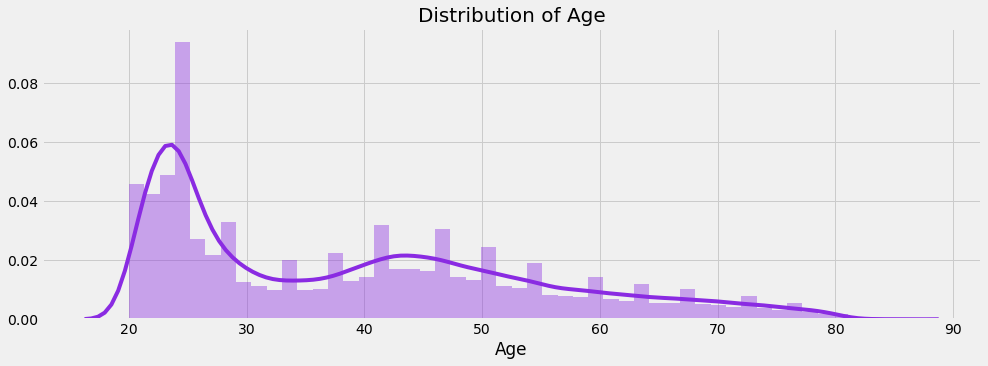

In [17]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'BlueViolet')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [18]:
df['age_category']=np.where((df['Age']<20),"below 20",
                                 np.where((df['Age']>19)&(df['Age']<=30),"20-30",
                                    np.where((df['Age']>30)&(df['Age']<=50),"31-50",
                                                np.where(df['Age']>50,"Above 50","NULL"))))

age=df['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=age['age_category'], y=age['Count'],
    mode='markers',
    marker=dict(
        color=age['Count'],
        size=age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title=' Age ',xaxis_title="Age Category",yaxis_title="Number Of People",title_x=0.5)
fig.show()

In [19]:
df_VD=df.groupby(by =['Gender','age_category','Vehicle_Damage'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Vehicle_Damage':'Vehicle_Damage','age_category':'Age Category','Age':'Count'})
df_VD['Vehicle_Damage']=df_VD['Vehicle_Damage'].astype('category')
df_VD

fig = px.bar(df_VD, x="Vehicle_Damage", y="Count",color="Age Category",barmode="group",
             facet_row="Gender"
             )
fig.update_layout(title_text='Age Category With Vehicle Damage And Gender',title_x=0.5)
fig.show()

In [20]:
df_Vehicle_Damage=df['Vehicle_Damage'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Damage','Vehicle_Damage':'count'})


fig = go.Figure([go.Pie(labels=df_Vehicle_Damage['Vehicle_Damage'], values=df_Vehicle_Damage['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Vehicle Damage",title_x=0.5)
fig.show()

In [21]:
df_Vintage=df.groupby(by =['Gender','age_category'])['Vintage'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Vintage':'Days'})
df_Vintage

fig = px.bar(df_Vintage, x="Age Category", y="Days",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Average Vintage Days With Gender,Age Class',title_x=0.5)
fig.show()

In [22]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]

df_PSC['index']='PSC_Cod '+df_PSC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_PSC['index'],y=df_PSC['Policy_Sales_Channel'],
    marker={'color': df_PSC['Policy_Sales_Channel'], 
    'colorscale': 'sunsetdark'},  
    text=df_PSC['Policy_Sales_Channel'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Policy Sales Channel Code',xaxis_title="Value",yaxis_title="Number Of People",title_x=0.5)
fig.show()

In [23]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]
indexs=df_PSC['index']
df_PSC_age=df.groupby('Policy_Sales_Channel')['Age'].mean().to_frame().reset_index()

avg_age = []
age_cod=[]
for number in indexs:
    
    df_PSC_age_top1=df_PSC_age[df_PSC_age['Policy_Sales_Channel']==number]['Age']
    avg_age.extend(df_PSC_age_top1)
        
         
df_PSC_age = pd.DataFrame(avg_age)
df_PSC_Cod= pd.DataFrame(indexs)


frames = [df_PSC_age, df_PSC_Cod]

result = pd.concat(frames,axis=1)

result.columns = ['Age', 'Cod']

result['Cod']='PSC_Cod '+result['Cod'].astype('str')

fig = go.Figure(go.Bar(
    x=result['Cod'],y=result['Age'],
    marker={'color': result['Age'], 
    'colorscale': 'sunsetdark'},  
    text=result['Age'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Policy Sales Channel Code Average Age',xaxis_title="Policy Sales Channel",yaxis_title="Age",title_x=0.5)
fig.show()

In [24]:
df_DL=df.groupby(by =['Gender','Driving_License'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Age':'count'})
df_DL['Driving_License']=df_DL['Driving_License'].astype('category')
df_DL

fig = px.bar(df_DL, x="Driving_License", y="count",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Gender With Driving License',title_x=0.5)
fig.show()

In [25]:
df_Driving_License=df['Driving_License'].value_counts().to_frame().reset_index().rename(columns={'index':'Driving_License','Driving_License':'count'})


fig = go.Figure([go.Pie(labels=df_Driving_License['Driving_License'], values=df_Driving_License['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Customer Driving License",title_x=0.5)
fig.show()

               Driving_License 
         0 : Customer does not have DL 
         1 : Customer already has DL 

In [26]:
df_RGC=df.Region_Code.value_counts().to_frame().reset_index()[0:10]

df_RGC['index']='R_Cod '+df_RGC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_RGC['index'],y=df_RGC['Region_Code'],
    marker={'color': df_RGC['Region_Code'], 
    'colorscale': 'portland'},  
    text=df_RGC['Region_Code'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Region Code',xaxis_title="Region Code",yaxis_title="Number Of People",title_x=0.5)
fig.show()

In [27]:


df_V_Age=df['Vehicle_Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Age','Vehicle_Age':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=df_V_Age['Vehicle_Age'], y=df_V_Age['Count'],
    mode='markers',
    marker=dict(
        color=df_V_Age['Count'],
        size=df_V_Age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title='Vehicle Age ',xaxis_title=" Vehicle Age ",yaxis_title="Number Of Vehicle",title_x=0.5)
fig.show()

In [28]:
df_VAge_AP_mean=df.groupby(by =['Vehicle_Age'])['Annual_Premium'].mean().to_frame().reset_index().rename(columns={'Vehicle_Age':'Vehicle_Age','Annual_Premium':'Annual_Premium'})
df_VAge_AP_mean


fig = go.Figure(go.Bar(
    x=df_VAge_AP_mean['Vehicle_Age'],y=df_VAge_AP_mean['Annual_Premium'],
    marker={'color': df_VAge_AP_mean['Annual_Premium'], 
    'colorscale': 'portland'},  
    text=df_VAge_AP_mean['Annual_Premium'],
    textposition = "outside",
))
fig.update_layout(title_text='Vehicle Age With Annual Premium',xaxis_title="Vehicle Age",yaxis_title="Premium Price",title_x=0.5)
fig.show()

In [29]:
df_Response=df['Response'].value_counts().to_frame().reset_index().rename(columns={'index':'Response','Response':'count'})


fig = go.Figure([go.Pie(labels=df_Response['Response'], values=df_Response['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Response",title_x=0.5)
fig.show()

In [30]:
df_gender_Previously_Insured=df.groupby(by =['Gender','Previously_Insured'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Previously_Insured':'Previously_Insured','Age':'Count'})
df_gender_Previously_Insured['Previously_Insured']=df_gender_Previously_Insured['Previously_Insured'].astype('category')

fig = px.bar(df_gender_Previously_Insured, x="Gender", y="Count",color="Previously_Insured",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Previously Insured',title_x=0.5)
fig.show()

In [31]:
df_gender_response=df.groupby(by =['Gender','Response'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Response':'Response','Age':'Count'})
df_gender_response['Response']=df_gender_response['Response'].astype('category')

fig = px.bar(df_gender_response, x="Gender", y="Count",color="Response",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Response',title_x=0.5)
fig.show()

In [32]:

df_gender_Vehicle_Age=df.groupby(by =['Response','Vehicle_Age'])['Age'].count().to_frame().reset_index().rename(columns={'Response':'Response','Vehicle_Age':'Vehicle_Age','Age':'Count'})
df_gender_Vehicle_Age['Response']=df_gender_Vehicle_Age['Response'].astype('category')

fig = px.bar(df_gender_Vehicle_Age, x="Response", y="Count",color="Vehicle_Age",barmode="group",
             
             )
fig.update_layout(title_text='Response With Vehicle Age',title_x=0.5)
fig.show()

Correlation Matrix


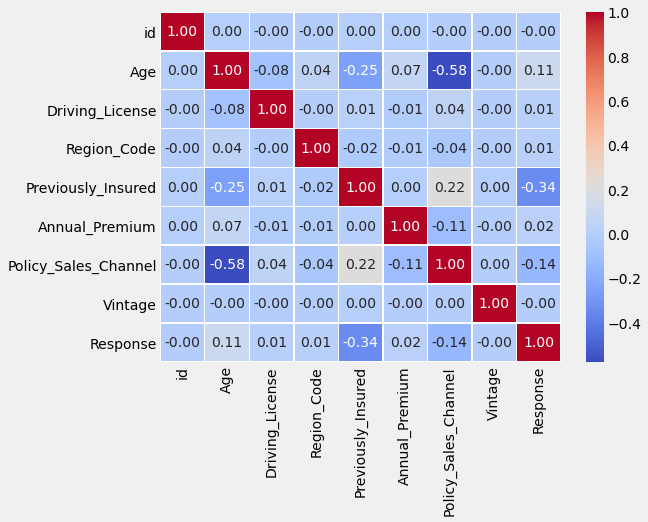

In [33]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

# <a id='4'>4.Data Preprocessing </a>

In [34]:
test=pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')
df_model=train.copy()
df_model=df_model.drop(['id'], axis=1)
df_model.head(5)

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [35]:
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

df_model['Gender']= df_model['Gender'].map(gender_map)
df_model['Vehicle_Age']= df_model['Vehicle_Age'].map(vehicle_age_map)
df_model['Vehicle_Damage']= df_model['Vehicle_Damage'].map(vehicle_damage_map)
df_model.head(5)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1         28.0                   0            2   
1       0   76                1          3.0                   0            1   
2       0   47                1         28.0                   0            2   
3       0   21                1         11.0                   1            0   
4       1   29                1         41.0                   1            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                  26.0      217         1  
1               0         33536.0                  26.0      183         0  
2               1         38294.0                  26.0       27         1  
3               0         28619.0                 152.0      203         0  
4               0         27496.0                 152.0       39         0

In [36]:
df_model['Region_Code']=df_model['Region_Code'].astype(int)
df_model['Policy_Sales_Channel']=df_model['Policy_Sales_Channel'].astype(int)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  int64  
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  int64  
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 32.0 MB


## Local Outlier Factor

![](http://upload.wikimedia.org/wikipedia/commons/4/4e/LOF-idea.svg)
*  The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

In [37]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [38]:
df_out=df_model.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [39]:
df_scores[0:10]

array([-0.98040985, -1.21319855, -0.99002209, -1.04205167, -1.0189965 ,
       -0.9917677 , -0.99149644, -0.99166232, -1.01552097, -1.02978322])

In [40]:
np.sort(df_scores)[0:20]

array([-712.06136843,   -3.6391412 ,   -3.58367092,   -3.5134539 ,
         -3.20800815,   -3.1376761 ,   -3.13481683,   -3.11241063,
         -3.10043685,   -3.08487422,   -3.02459958,   -3.01486655,
         -2.96926788,   -2.94888206,   -2.94186409,   -2.93538124,
         -2.84130409,   -2.82698711,   -2.82698681,   -2.82698668])

In [41]:
threshold_value = np.sort(df_scores)[1]
threshold_value

-3.6391412042125078

In [42]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
19204       0   22                1           45                   1   

       Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
19204            0               0          6098.0                   152   

       Vintage  Response  
19204       87         0

In [43]:
# Kick Outliers
for i in indexs:
    df_model.drop(i, axis = 0,inplace = True)

In [44]:
y=df_model['Response']
X=df_model.drop('Response',axis=1)

print('X shape :',X.shape)
print('y shape :',y.shape)

X shape : (381108, 10)
y shape : (381108,)


In [45]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head(2)

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0     0.0  0.369231              1.0     0.538462                 0.0   
1     0.0  0.861538              1.0     0.057692                 0.0   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0          1.0             1.0        0.070366              0.154321  0.716263  
1          0.5             0.0        0.057496              0.154321  0.598616

In [46]:
# Data split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

In [47]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (304886, 10)
X_test : (76222, 10)
y_train : (304886,)
y_test : (76222,)



 ## <a id='5'> 5.Logistic Regression</a>

In [48]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [49]:
y_pred_loj = loj_model.predict(X_test)

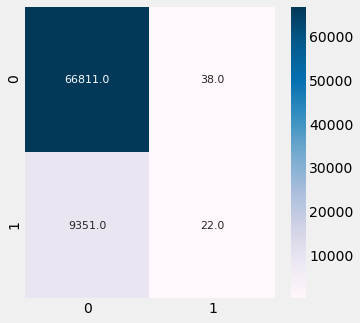

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_loj)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".1f");

In [51]:
print("Training Accuracy :", loj_model.score(X_train, y_train))

print("Testing Accuracy :", loj_model.score(X_test, y_test))

Training Accuracy : 0.8773541586035436
Testing Accuracy : 0.8768203405840833


In [52]:
print(classification_report(y_test, y_pred_loj))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.37      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.62      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [53]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8767285011768683

 ## <a id='6'> 6.Gaussian Naive Bayes</a>

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [55]:
y_pred_nb = nb_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred_nb)

0.6408517225997743

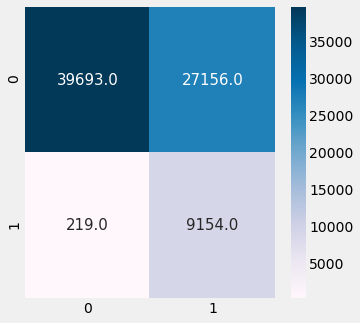

In [57]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [58]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66849
           1       0.25      0.98      0.40      9373

    accuracy                           0.64     76222
   macro avg       0.62      0.79      0.57     76222
weighted avg       0.90      0.64      0.70     76222



 ## <a id='7'> 7.KNN</a>

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [60]:
y_pred_knn = knn_model.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred_knn)

0.8561701346068065

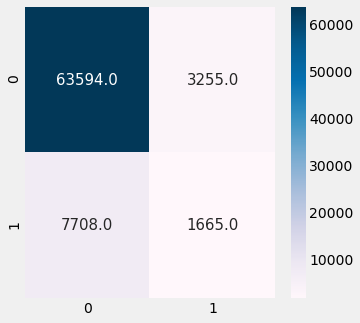

In [62]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [63]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66849
           1       0.34      0.18      0.23      9373

    accuracy                           0.86     76222
   macro avg       0.62      0.56      0.58     76222
weighted avg       0.82      0.86      0.84     76222



 ## <a id='8'>8.Artificial Neural Networks </a>

In [64]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train, y_train)

In [65]:
y_pred_mlpc = mlpc.predict(X_test)
accuracy_score(y_test,y_pred_mlpc)

0.8770040145889638

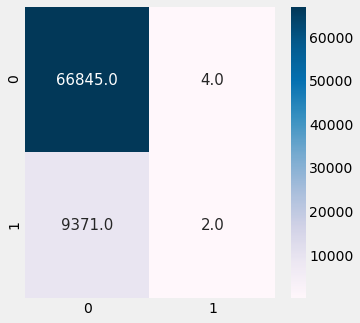

In [66]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_mlpc)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [67]:
print(classification_report(y_test, y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.33      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.61      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



 ## <a id='9'>9.Random Forest </a>

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [69]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8663640418776731

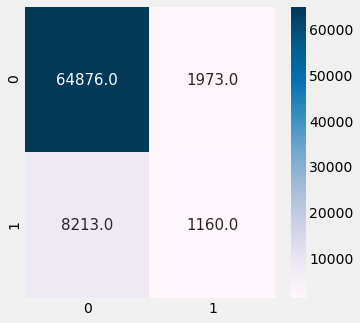

In [70]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [71]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66849
           1       0.37      0.12      0.19      9373

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222



In [72]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

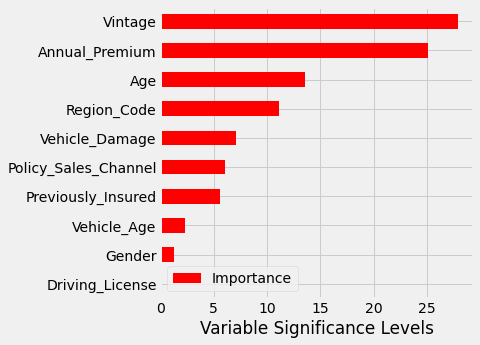

In [73]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

 ## <a id='10'>10.Gradient Boosting Machines </a>

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [76]:
y_pred_gbm = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred_gbm)

0.8769908950171866

In [77]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.00      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



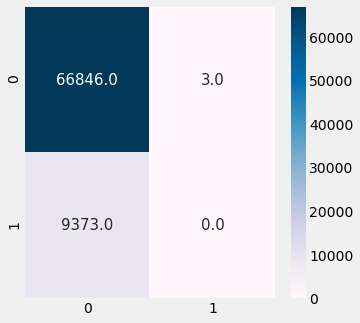

In [78]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

 ## <a id='11'>11.XGBoost  </a>

In [79]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, y_train)

In [80]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb_model)

0.8762824381412191

In [81]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.45      0.03      0.05      9373

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.49     76222
weighted avg       0.83      0.88      0.83     76222



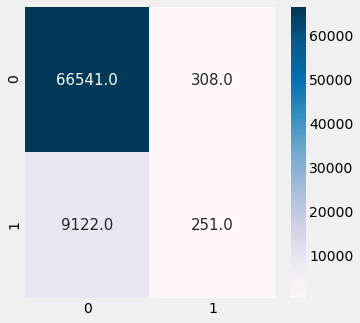

In [82]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

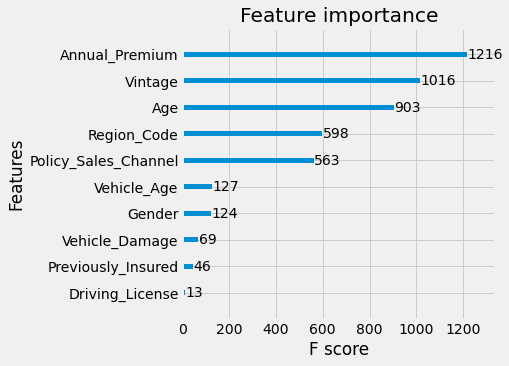

In [83]:
xgb.plot_importance(xgb_model)

In [84]:
from sklearn.metrics import roc_curve, auc

xgb_model=XGBClassifier().fit(X_train, y_train)

y_score = xgb_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [85]:
# Model Tuning
XGB_model = XGBClassifier(random_state = 42, max_depth = 8, n_estimators = 3000, 
                          reg_lambda = 1.2, reg_alpha = 1.2, 
                          min_child_weight = 1,objective = 'binary:logistic',
                         learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5,
                          eval_metric = 'auc').fit(X_train, y_train)

In [86]:
y_pred_XGB_model = XGB_model.predict(X_test)
accuracy_score(y_test, y_pred_XGB_model)

0.8654850305686023

In [87]:
print(classification_report(y_test, y_pred_XGB_model))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66849
           1       0.37      0.13      0.19      9373

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.87      0.84     76222



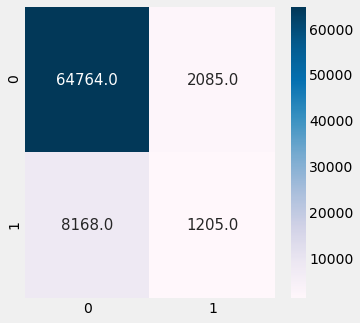

In [88]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_XGB_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

 ## <a id='12'>12.LightGBM  </a>

In [89]:
from lightgbm import LGBMClassifier

In [90]:
LGB_model = LGBMClassifier(random_state=42, max_depth= 8,n_estimators=3000,
                    reg_lambda=1.2, reg_alpha=1.2, min_child_weight=1,verbose= 1,
                    learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5,
                    eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5, eval_metric='auc', gamma=0.3,
               is_higher_better=1, learning_rate=0.15, max_depth=8,
               min_child_weight=1, n_estimators=3000, plot=True,
               random_state=42, reg_alpha=1.2, reg_lambda=1.2, verbose=1)

In [91]:
y_pred_lgbm_model = LGB_model.predict(X_test)
accuracy_score(y_test, y_pred_lgbm_model)

0.8717168271627614

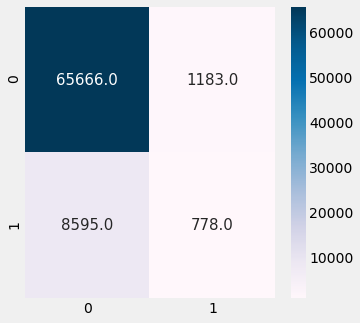

In [92]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [93]:
print(classification_report(y_test, y_pred_lgbm_model))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66849
           1       0.40      0.08      0.14      9373

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222



## <a id='13'> 13.Comparison of All Models </a>

In [94]:
models = [
    knn_model,
    loj_model,
    nb_model,
    mlpc,
    gbm_model,
    LGB_model,
    xgb_model,
    XGB_model,
    rf_model,
      
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 85.6170%
----------------------------
LogisticRegression:
Accuracy: 87.6820%
----------------------------
GaussianNB:
Accuracy: 64.0852%
----------------------------
MLPClassifier:
Accuracy: 87.7004%
----------------------------
GradientBoostingClassifier:
Accuracy: 87.6991%
----------------------------
LGBMClassifier:
Accuracy: 87.1717%
----------------------------
XGBClassifier:
Accuracy: 87.6282%
----------------------------
XGBClassifier:
Accuracy: 86.5485%
----------------------------
RandomForestClassifier:
Accuracy: 86.6364%


In [ ]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy Ratios of Models'); 

## <a id='14'>  Conclusion </a>

This dataset is unstable.<br>
Learning is less because the dataset is unstable.<br>
F1 score so low.We say that every incoming data does not take.<br>
We can create new data columns.<br>
We can drop the columns that are not important.We need do feature engineering.<br>

## <a id='15'> <font color="LIGHTSEAGREEN" size=+2.5><b>End Note</b></font> </a>

I hope you enjoyed my kernel.If you like this notebook, an Upvote would be great ! :)

I am new with data science. Please comments me your feedbacks to help me improve myself.

Thanks for your time